In [4]:
from joblib import dump, load
import numpy as np
import cv2
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#import the clustered ds swatches
hsv_knn = load('ds_hsv_knn.joblib')

# Validation steps
1. import an image made from five swatches of ds paints
2. collect the hsv and shifted HSV values
3. Drop the neutral tones
4. Cluster on K-means++ and collect the top 5 clusters
5. Match those clusters to the hsv_knn model

## Import the test image
Order of test image:

alizarin_crimson  | Quin_Rose. | Lemon_Yellow | new_gamboge

french_ultramarine | Pth_bl_GS | Sap_green | Raw_umber

In [7]:
img = cv2.imread('/Users/macbook/Box/insight_project_data/test_image/eight_swatches.jpg')

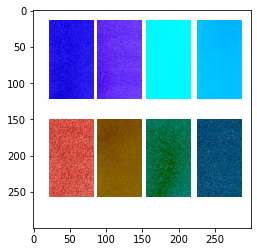

In [9]:
#don't forget it is in brg
plt.imshow(img)

In [10]:
#convert to hsv
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [13]:
#convert to pixels
pixels = np.float32(img_HSV.reshape(-1, 3))

In [18]:
def shift_h(data, v_thresh, s_thresh):
    """Produces shifted H values for color segmentation
    Inputs: data - list of pixel H, S, V values one entry per pixel
    Outputs: H, H120, H240
    """
    shifted_colors = []
    for i in range(0,len(data)):
        H = data[i][0]
        s = data[i][1]
        v = data[i][2]
        V_thres = 255*v_thresh
        S_thres = 255*s_thresh
        if (v > V_thres and s > S_thres):
            if H >= 120:
                H120 = H - 120
            else:
                H120 = H + 60
            if H >= 60:
                H240 = H - 60
            else:
                H240 = H + 120
        else:
            H = 200 + ((v/255)*55)
            H120 = H
            H240 = H
        shifted_colors.append([H,H120,H240])
    return shifted_colors
            

In [19]:
pixels_shift = shift_h(pixels, .25, .25)

In [20]:
pixels_shift

[[255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 255.0],
 [255.0, 255.0, 